In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cleaned_Anime.csv',index_col=0)
df['Release_year'] = pd.to_datetime(df['Release_year'] )
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13254 entries, 0 to 15488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          13254 non-null  object        
 1   Rank          13254 non-null  float64       
 2   Rating        13254 non-null  float64       
 3   Release_year  13254 non-null  datetime64[ns]
 4   Episodes      13254 non-null  float64       
 5   Type          13254 non-null  object        
 6   Studio        13254 non-null  object        
 7   Tags          13254 non-null  object        
 8   staff         13254 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 1.0+ MB


# Filter to remove Anime Movies and only interested Columns

In [3]:
Filtered_df = df[(df['Type']!= 'Movie') & (df.staff != 'unknown') ].loc[:,['Name','Tags']]

#Remove square brackets 
Filtered_df['Tags'] = Filtered_df['Tags'].str.replace(r'\[|\]','',regex = True)
Filtered_df.set_index('Name', inplace=True)

# Identify Genres I like from Animes I have watched and liked

In [12]:
with pd.option_context('display.max_colwidth', None):
    print(Filtered_df[Filtered_df.index.str.contains('Overlord', case = False)])

Interested_Genres = ['Action', 'Adventure', 'Comedy', 'Drama',\
'Fantasy','Shounen','Martial Arts', 'Violence','Superpowers',\
                    'Seinen','Swordplay', 'Magic','Dark Fantasy','RPG', 'Based on a Light Novel' ]

                                                                                                                                                                                                                                                                                          Tags
Name                                                                                                                                                                                                                                                                                          
Overlord                                                                   Action, Adventure, Fantasy, Sci Fi, Dark Fantasy, Isekai, Magic, Overpowered Main Characters, Person in a Strange World, RPG, Skeletons, Trapped in a Video Game, Virtual Reality, Based on a Light Novel, Violence
Overlord 6: Drama CD-tsuki Tokusou-ban - Yokoku-hen                                                                                        

# Add interesting genres to DF

In [13]:
Filtered_df[Interested_Genres] = 0
Filtered_df[Interested_Genres] = Filtered_df[Interested_Genres].astype(float)
Filtered_df

,Tags,Action,Adventure,Comedy,Drama,Fantasy,Shounen,Martial Arts,Violence,Superpowers,Seinen,Swordplay,Magic,Dark Fantasy,RPG,Based on a Light Novel
Name,,,,,,,,,,,,,,,,
"""Anata wo Hitokoto de Arawashite Kudasai"" no Shitsumon ga Nigate da","Promotional, Shorts",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Bungaku Shoujo"" Memoire","Drama, Romance, Episodic, School Life, Based o...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""Eiyuu"" Kaitai","Drama, Fantasy, Slice of Life, Person in a Str...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Compass,"Sci Fi, Episodic, Short Episodes, Based on a M...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
(Making of) Evangelion: Another Impact,"Sci Fi, Japan Animator's Exhibition, Shorts, C...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxxHOLiC Rou,"Drama, Seinen, Japanese Mythology, Supernatura...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xxxHOLiC Shunmuki,"Comedy, Seinen, Crossover, Japanese Mythology,...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zap dog,"Comedy, Animal Protagonists, Dogs, Food Protag...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create an Algorithm to set weigths of each Interested Genre

In [21]:
for name, genres in zip(Filtered_df.index,Filtered_df['Tags']):
    tags = genres.split(',')
    
    
    '''  
    Interested_Genres = ['Action', 'Adventure', 'Comedy', 'Drama',\
    'Fantasy','Shounen','Martial Arts', 'Violence','Superpowers',\
                        'Seinen','Swordplay', 'Magic','Dark Fantasy','RPG', 'Based on a Light Novel' ]
    '''
    for genre in tags:
        genre = genre.strip()
        #Add weights(Importance)to the genre
        if genre in ['Seinen', 'Swordplay','Magic','Dark Fantasy', 'Drama', 'Superpowers']:
            Filtered_df.loc[name,genre] = 1
        elif genre in ['Based on a Light Novel','RPG', 'Comedy']:
            Filtered_df.loc[name,genre] = .5
        elif genre in ['Martial Arts','Action', 'Adventure','Shounen', 'Violence', 'Fantasy']:
            Filtered_df.loc[name,genre] = 2

            

# Retrieve the Total and return top 15 animes

In [22]:
Filtered_df['Total'] = Filtered_df.iloc[:,1:-1].sum(axis=1)
print(Filtered_df.Total.median())
Filtered_df.sort_values('Total', ascending = False, inplace =True)
Top_10 = Filtered_df.iloc[:15]
Top_10

2.0


,Tags,Action,Adventure,Comedy,Drama,Fantasy,Shounen,Martial Arts,Violence,Superpowers,Seinen,Swordplay,Magic,Dark Fantasy,RPG,Based on a Light Novel,Total
Name,,,,,,,,,,,,,,,,,
Demon Slayer: Kimetsu no Yaiba,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",2.0,2.0,0.5,1.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.5
JoJo's Bizarre Adventure (2000),"Action, Adventure, Fantasy, Shounen, Martial A...",2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
JoJo's Bizarre Adventure,"Action, Adventure, Fantasy, Shounen, Martial A...",2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
Edens Zero,"Action, Adventure, Fantasy, Sci Fi, Shounen, A...",2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
Hunter x Hunter,"Action, Adventure, Fantasy, Shounen, Martial A...",2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
I'm Standing on a Million Lives,"Action, Adventure, Comedy, Drama, Fantasy, Rom...",2.0,2.0,0.5,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,12.0
That Time I Got Reincarnated as a Slime,"Action, Adventure, Comedy, Fantasy, Shounen, C...",2.0,2.0,0.5,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0,12.0
The Seven Deadly Sins: Signs of Holy War,"Action, Adventure, Fantasy, Shounen, Magic, Me...",2.0,2.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0
The Seven Deadly Sins,"Action, Adventure, Fantasy, Shounen, Demons, M...",2.0,2.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0


# Graph representation

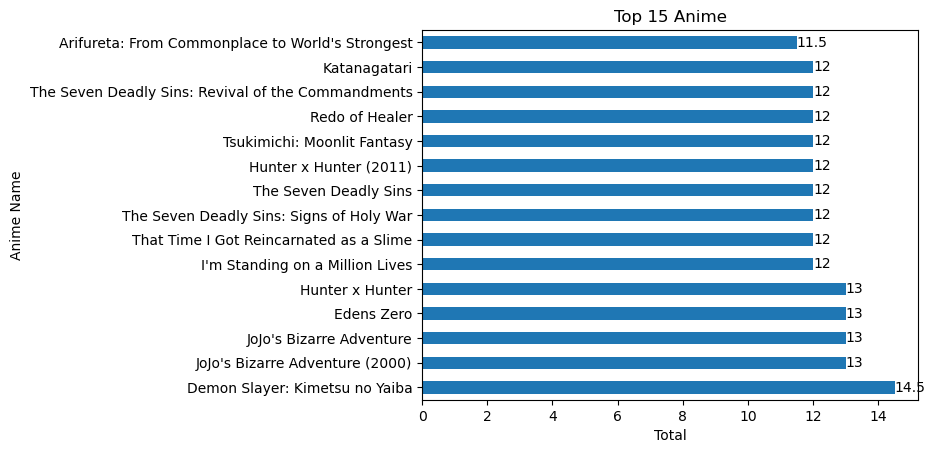

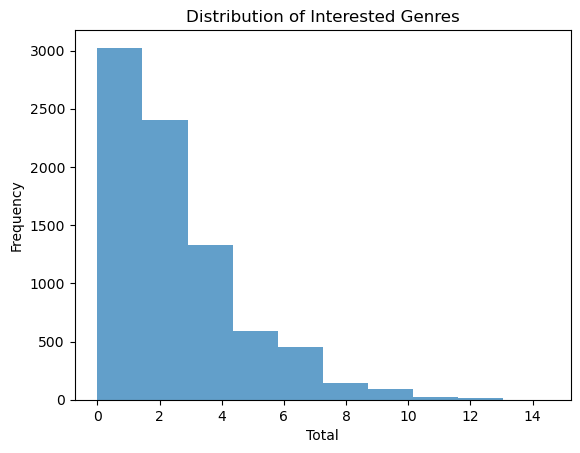

In [23]:
ax = Top_10.plot.barh(y = 'Total', ylabel= 'Anime Name',xlabel='Total',legend = False)

# Add text annotations
for i in ax.containers:
    ax.bar_label(i, label_type='edge')
    
plt.title('Top 15 Anime')
plt.show()


Filtered_df['Total'].plot(bins = 10, kind = 'hist', alpha=0.7)
# Set the labels and title
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.title('Distribution of Interested Genres')

# Show the plot
plt.show()
